<a href="https://colab.research.google.com/github/EssenceBL/MakingFriends/blob/main/Study_Notes_C_Towards_Integral_Apollonian_Packing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Foreword**

This series of Colab notebooks contains study notes related to Descartes' Circle Theorem. The motivation for this work originated from attending Professor Peter Sarnak's Shaw Prize Lecture in Mathematical Sciences in 2024. Not only does his lecture begin with Descartes' Circle Theorem, but he also provides significant insights into the importance of establishing a "base" for one’s long-term endeavors. Reflecting on his remarks, I believe that exploring mathematical concepts through Python code could serve as my "base," drawing from prior experiences; thus, I produced this series of Colab notebooks. Some of the code comes from iterative collaboration with DeepSeek, representing an experiment that integrates traditional mathematical mindsets with contemporary computational methodologies.

YK with DeepSeek, 2025

Like other Colab notebooks, please run the code cells one by one. In particular, the following code cell concerns the dependency packages and needs to be run first. It might take a while, so please be patient.

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import cmath
import math

Recall from Study Notes B the ***Descartes' Circle Theorem***, which provides a symmetric relation on the curvatures of four circles that are mutually tangent at six distinct points. Suppose $b_1$, $b_2$, and $b_3$ are curvatures of these circles, the curvature of the forth circle $b_4$ can be computed by solving the following quadratic equation in $b_4$:

\begin{align}
&(b_1+b_2+b_3+b_4)^2=2(b_1^2+b_2^2+b_3^2+b_4^2)\\
⇔\;&b_4^2 - 2(b_1+b_2+b_3) b_4 + (b_1^2+b_2^2+b_3^2 - 2b_1b_2-2b_1b_3-2b_2b_3) =0\\
⇔\;&
b_4^2 - 2(b_1+b_2+b_3) b_4 + 2(b_1^2+b_2^2+b_3^2) - (b_1+b_2+b_3)^2 =0 \tag{1}
\end{align}

In fact, given any three mutually tangent circles, there are exactly a pair of choices of a forth mutually tangent circle. The existence of this pair of circles is know as the ***Apollonius' Theorem***. Now, let's say the curvatures of this pair of circles is $b_{4+}$ and $b_{4-}$. Their value can be both positive, or one being positive and the other being negative. By considering the sum of roots of the above quadratic equation (1), there is a simple relation between $b_{4+}$ and $b_{4-}$:

\begin{align*}
b_{4+} + b_{4-} = 2(b_1+b_2+b_3).
\end{align*}

In the setting of Descartes' Circle Theorem, there are four mutually tangent circles that touch one another at six distinct points. In further study, one may start with any three circles, leaving the fourth one aside, and then ask about the other choices of touching circles in relation to these three circles. There are four ways to choose three circles from the four, namely $C_a$, $C_b$, $C_c$, and $C_d$. As shown in the following figure, each of these circles has a corresponding pair: $C_{a'}$, $C_{b'}$, $C_{c'}$, and $C_{d'}$.

<img src="https://drive.google.com/uc?id=1T0dgfancZ6xqtwmcRm02FcsFR-MtcFNh" width="100%">






Denote the curvatures of $C_a$, $C_b$, $C_c$, $C_d$, $C_{a'}$, $C_{b'}$, $C_{c'}$ and $C_{d'}$ by $b_a$, $b_b$, $b_c$, $b_d$, $b_{a'}$, $b_{b'}$, $b_{c'}$ and $b_{d'}$ respectively. Then
\begin{align*}
b_a + b_{a'}&=2(b_b+b_c+b_d),\\
b_b + b_{b'}&=2(b_a+b_c+b_d),\\
b_c + b_{c'}&=2(b_a+b_b+b_d),\\
b_d + b_{d'}&=2(b_a+b_b+b_c).\\
\end{align*}

And so there are four different actions that one transform the initial 4-tuple (quadruples) of curvatures $(b_a, b_b, b_c, b_d)$ of four touching circles, namely:
\begin{align*}
S_a:(b_a, b_b, b_c, b_d)\mapsto (b_{a'}, b_b, b_c, b_d) = (2b_b+2b_c+2b_d-b_a, b_b, b_c, b_d),\\
S_b:(b_a, b_b, b_3, b_d)\mapsto (b_a, b_{b'}, b_c, b_d) = (b_a, 2b_a+2b_c+2b_d-b_b, b_c, b_d),\\
S_c:(b_a, b_b, b_c, b_d)\mapsto (b_a, b_b, b_{c'}, b_d) = (b_a, b_b, 2b_a+2b_b+2b_d-b_c, b_d),\\
S_d:(b_a, b_b, b_c, b_d)\mapsto (b_a, b_b, b_c, b_{d'}) = (b_a, b_b, b_c, 2b_a+2b_b+2b_c-b_d).
\end{align*}


Clearly, there is also a corresponding matrix description for the effect of $S_a$, $S_b$,  $S_c$ and $S_d$ acting on the initial 4-tuple $(b_a, b_b, b_c, b_d)$ as a row vector by matrix multiplication on the right-hand side of the 4-tuple.

$S_a = \begin{pmatrix}
-1 & 0 & 0 & 0 \\
2 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
2 & 0 & 0 & 1
\end{pmatrix}$, $S_b = \begin{pmatrix}
1 & 2 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 2 & 1 & 0 \\
0 & 2 & 0 & 1
\end{pmatrix}$, $S_c = \begin{pmatrix}
1 & 0 & 2 & 0 \\
0 & 1 & 2 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 2 & 1
\end{pmatrix}$, $S_d = \begin{pmatrix}
1 & 0 & 0 & 2 \\
0 & 1 & 0 & 2 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & -1
\end{pmatrix}$

Alternatively, one may take the initial 4-tuple as column vector, take transpose of the above matrix and multiply on the left hand side.

But here the choice of using row vectors actually follows convention as in [Peter Sarnak's MAA Lecture: Integral Apollonian Packings](https://web.math.princeton.edu/sarnak/InternalApollonianPackings09.pdf).

Note that these transformation on the 4-tuple is also involutory, because one can compute that $S_i^2=I$ for $i = a,b,c,d$.


To this end, one could iteratively let $S_a$, $S_b$, $S_c$ and $S_d$ act on the 4-tuple to obtain the next generation of curvatures of touching circles. The collection of all touching circles generated is the ***Apollonian Circle Packing***, also known as the ***Apollonian Gasket***. The following circle packing is the collection of iterations over a few generations:

<img src="https://drive.google.com/uc?id=1dZoRixDsjQYf1tpeHRpR6aHoA39diCmc" width="55%">

Remarkably, all entries in $S_a$, $S_b$, $S_c$ and $S_d$ are integers, therefore if the initial 4-tuple consists of all integral curvature, all other curvatures in the assoicated Apollonian Gasket generated by $S_a$, $S_b$, $S_c$ and $S_d$ and their compositions would all be integers. These special packings are called ***Integral Apollonian Packings***.

The study of integers solution to $(b_1+b_2+b_3+b_4)=2(b_1^2+b_2^2+b_3^2+b_4^2)$ is hard. We list only some small feasible integral 4-tuple so that audience may use them editing the code in this notebooks $(2,2,3,-1)$, $(3,6,7,-2)$, $(4,12,13,-3)$, $(5, 8, 8, −3)$, $(5,20,21,-4)$, $(11,14,15,-6)$, $(12, 17, 20, −7)$. Also note that the negative sign in curvatures mean perspective of interior and exterior differed from others, visually, it will appear to be the largest circle "cotaining" other circle in the packings.

To make geometric construction, we also use a generalizaion [Beyond the Descartes Circle Theorem](https://arxiv.org/pdf/math/0101066) and describe the position of center of these circles via a generalized formula in complex numbers.

After developing the mathematical theory and identifying useful formulas, DeepSeek could function as an AI copilot to generate the following code for the audience to experiment with. At first, the code didn't work well as desired, but it should be working now after essential human input in tuning and rewriting some parts.

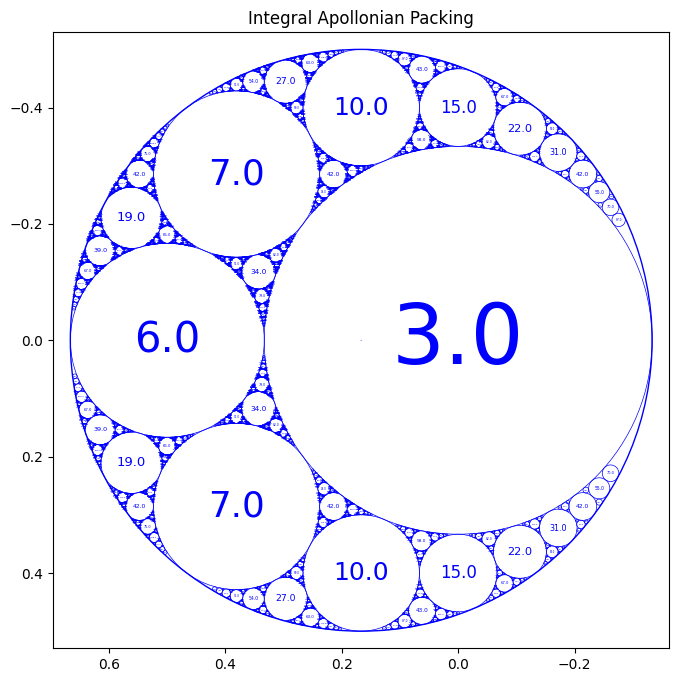

In [ ]:
class Circle:
  def __init__(self, curv, center):
    self.curv = curv
    self.center = center  # complex number
    self.radius = 1 / abs(curv) if curv != 0 else float('inf')

  def __eq__(self, other):
    tolerance = 1e-5
    return (abs(self.curv - other.curv) < tolerance and
            abs(self.center - other.center) < tolerance)

  def __hash__(self):
    return hash((self.curv, self.center.real, self.center.imag))

def compute_fourth_curvature(b1, b2, b3):
  sum_b = b1 + b2 + b3
  root_term = 2 * math.sqrt(abs(b1*b2 + b2*b3 + b3*b1))
  return sum_b + root_term, sum_b - root_term

def compute_fourth_circle(c1, c2, c3, b4):
  b1, b2, b3 = c1.curv, c2.curv, c3.curv
  z1, z2, z3 = c1.center, c2.center, c3.center

  sum_b = b1 + b2 + b3
  root_term = 2 * math.sqrt((b1*b2 + b2*b3 + b3*b1))
  b4_plus = sum_b + root_term
  b4_minus = sum_b - root_term
  #b4 = min(b4_plus, b4_minus, key=lambda x: abs(x))

  S = b1*z1 + b2*z2 + b3*z3
  Q = cmath.sqrt(b1*b2*z1*z2 + b1*b3*z1*z3 + b2*b3*z2*z3)
  z4_plus = (S + 2*Q) / b4_plus
  z4_minus = (S - 2*Q) / b4_minus
  # Check which solution is valid (inside the outer circle)
  candidates = []
  candidates.append(Circle(b4_plus, z4_plus))
  candidates.append(Circle(b4_minus, z4_minus))
  z4_plus = (S - 2*Q) / b4_plus
  z4_minus = (S + 2*Q) / b4_minus
  candidates.append(Circle(b4_plus, z4_plus))
  candidates.append(Circle(b4_minus, z4_minus))
  return candidates

def plot_circles(circles, ax):
  for circle in circles:
    if circle.curv == 0:
      continue
    radius = circle.radius
    center = circle.center
    color = 'blue' if circle.curv > 0 else 'red'
    circ = plt.Circle((center.real, center.imag), radius, fill=False, color=color, linewidth=0.5)
    ax.add_patch(circ)

def three_distinct_touching(c1, c2, c3):
  valid = True
  if not math.isclose(abs(1/c1.curv+1/c2.curv), abs(c1.center-c2.center), rel_tol=1e-6):
    valid = False
  if not math.isclose(abs(1/c1.curv+1/c3.curv), abs(c1.center-c3.center), rel_tol=1e-6):
    valid = False
  if not math.isclose(abs(1/c2.curv+1/c3.curv), abs(c2.center-c3.center), rel_tol=1e-6):
    valid = False
  if math.isclose(abs(c1.center-c2.center), 0, rel_tol=1e-6):
    valid = False
  if math.isclose(abs(c1.center-c3.center), 0, rel_tol=1e-6):
    valid = False
  if math.isclose(abs(c2.center-c3.center), 0, rel_tol=1e-6):
    valid = False
  return valid

def four_touching(c1, c2, c3, c4):
  valid = True

  circles = [c1, c2, c3, c4]
  for i in range(4):
    for j in range(1, 4):
      if not math.isclose(abs(1/circles[i].curv+1/circles[j].curv), abs(circles[i].center-circles[j].center), rel_tol=1e-6):
        valid = False
      if math.isclose(abs(circles[i].center-circles[j].center), 0, rel_tol=1e-6):
        valid = False
  return valid

def apollonian(c1, c2, c3, c4, g):
  circles = [c1, c2, c3, c4]
  i = 'abcd'.index(g)
  b = [circles[i].curv for i in range(4)]
  bz = [circles[i].curv*circles[i].center for i in range(4)]
  ci_new_curv = 2*(sum(b))-3*circles[i].curv
  ci_new_center = (2*(sum(bz))-3*circles[i].curv*circles[i].center)/ci_new_curv
  ci_new = Circle(ci_new_curv, ci_new_center)
  circles[i] = ci_new
  return circles[0], circles[1], circles[2], circles[3]

class ApollonianWordTuple:
  def __init__(self, fourTuple, generators=None):
    self.fourTuple = fourTuple  # No default to avoid NameError
    self.generators = generators.copy() if generators else ['a', 'b', 'c', 'd']
    # Each generator is its own inverse (modify if needed)
    self.inverse = {g: g for g in self.generators}
    self.generations = {}  # Cache for generations

  def get_generation(self, i):
    if i in self.generations:
      return self.generations[i]

    if i < 0:
      raise ValueError("Generation index cannot be negative")

    # Base case: generation 0 is the initial fourTuple
    if i == 0:
      gen = [["", self.fourTuple]]
      self.generations[0] = gen
      return gen

    # Recursive case: build from previous generation
    prev_gen = self.get_generation(i - 1)
    current_gen = []
    for word, circles in prev_gen:
      last_char = word[-1] if word else None
      forbidden = self.inverse.get(last_char, None)
      for g in self.generators:
        if g != forbidden:
          new_circles = apollonian(
            circles[0], circles[1], circles[2], circles[3], g
          )
          current_gen.append([word + g, new_circles])
    self.generations[i] = current_gen
    return current_gen

def plot_circles(circles, ax):
  for circle in circles:
    if circle.curv == 0:
      continue
    radius = circle.radius
    center = circle.center
    color = 'blue'# if circle.curv > 0 else 'red'
    if circle.curv > 0:
      circ = plt.Circle((center.real, center.imag), radius, fill=False, color=color, linewidth=0.5)
    else:
      circ = plt.Circle((center.real, center.imag), radius, fill=False, color=color, linewidth=1)
    if radius > 9e-5:
      ax.add_patch(circ)

def main():
  # Generate up to how many generations
  generations = 9
  # Input curvatures (example: 2, 2, 3) (2,2,3) ,  (3,6,7)
  b1, b2, b3 = 3, 6, 7
  b4_plus, b4_minus = compute_fourth_curvature(b1, b2, b3)
  b4 = min(b4_plus, b4_minus, key=lambda x: abs(x))  # Choose enclosing circle (negative)
  z1 = 0 + 0j
  z2 = 1/b1+1/b2 + 0j
  x = (1/(b1*b1)+1/(b1*b2)+1/(b1*b3)-1/(b2*b3))/(1/b1+1/b2)
  z3 = x - cmath.sqrt(-(1/b1+1/b3)*(1/b1+1/b3)+x*x)
  b4_plus = compute_fourth_curvature(b1, b2, b3)[0]
  b4_minus = compute_fourth_curvature(b1, b2, b3)[1]
  S = b1*z1 + b2*z2 + b3*z3
  Q = cmath.sqrt(b1*b2*z1*z2 + b1*b3*z1*z3 + b2*b3*z2*z3)
  z4_plus = (S + 2*Q) / b4_plus
  z4_minus = (S - 2*Q) / b4_minus
  # Initial circles
  circles = [Circle(b1, z1), Circle(b2, z2), Circle(b3, z3), Circle(b4_minus, z4_minus)]

  drawApollonian = ApollonianWordTuple(fourTuple = circles)
  for i in range(1,generations):
    for word, Tuple in drawApollonian.get_generation(i):
      circle = Tuple['abcd'.index(word[-1])]
      circles.append(circle)

  # Plot
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_aspect('equal')
  ax.set_title("Integral Apollonian Packing")
  ax.set_xlim(z4_minus.real-1/b4_minus+1/b4_plus, z4_minus.real+1/b4_minus-1/b4_plus)
  ax.set_ylim(z4_minus.imag-1/b4_minus+1/b4_plus, z4_minus.imag+1/b4_minus-1/b4_plus)
  plot_circles(circles, ax)
  for circle in circles:
    if circle.radius > 9e-5:
      plt.text(circle.center.real, circle.center.imag, f"{circle.curv:.1f}", ha='center', va='center', color='blue', fontsize=b2*30/circle.curv)
  plt.show()
if __name__ == "__main__":
  main()